In [ ]:
"""
Create a personalized compliment agent

Objectives:
1. Understand and define the AgentState structure
2. Create simple node functions to process and update state
3. Setup basic LangGraph structure
4. Compile and invoke a LangGraph graph
5. Understand how data flows through a single-node in LangGraph
"""

'\nObjectives:\n1. Understand and define the AgentState structure\n2. Create simple node functions to process and update state\n3. Setup basic LangGraph structure\n4. Compile and invoke a LangGraph graph\n5. Understand how data flows through a single-node in LangGraph\n'

In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
  message: str

def compliment_node(state: AgentState) -> AgentState:
  """ Simple node that adds a compliment message to the state"""

  state['message'] = state['message'] + " , you're doing an amazing job learning LangGraph!"

  return state

In [4]:
graph = StateGraph(state_schema=AgentState)

graph.add_node("complimenter", compliment_node)
graph.set_entry_point("complimenter")
graph.set_finish_point("complimenter")

app = graph.compile()

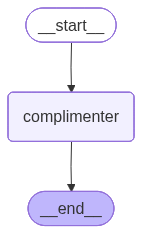

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"message": "Bob"})

In [7]:
result['message']

"Bob , you're doing an amazing job learning LangGraph!"